In [14]:
import datetime
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [15]:
# 지표 데이터 가져오기 （‘Ｍ’단위）２０１４、１１－２０２４、０６
stock_data = pd.read_excel('index_Infomation_v0.1.xlsx')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data

,Date,nasdaq_Close,snp500_Close,DJI_Close,KOSPI_Close,samsung_PER,samsung_PBR,samsung_ROE,apple_PER,apple_PBR,...,중앙은행 기준금리,생산자물가지수,수입물가지수,소비자물가지수,수입,수출,경상수지,소비자심리지수,기업경기실사지수,foreign_exchange_reserves
0,2014-01-02,4143.069824,1831.979980,16441.349609,1967.19,8.50,1.90,0.223529,2.707603,4.225919,...,2.5,101.57,123.71,93.73,115.7,104.12,1837.7,110.0,72,"3,484"
1,2014-01-03,4131.910156,1831.369995,16469.990234,1946.14,8.41,1.88,0.223543,2.648126,4.133090,...,2.5,101.57,123.71,93.73,115.7,104.12,1837.7,110.0,72,"3,484"
2,2014-01-04,4131.910156,1831.369995,16469.990234,1946.14,8.41,1.88,0.223543,2.648126,4.133090,...,2.5,101.57,123.71,93.73,115.7,104.12,1837.7,110.0,72,"3,484"
3,2014-01-05,4131.910156,1831.369995,16469.990234,1946.14,8.41,1.88,0.223543,2.648126,4.133090,...,2.5,101.57,123.71,93.73,115.7,104.12,1837.7,110.0,72,"3,484"
4,2014-01-06,4113.680176,1826.770020,16425.099609,1953.28,8.49,1.90,0.223793,2.662568,4.155630,...,2.5,101.57,123.71,93.73,115.7,104.12,1837.7,110.0,72,"3,484"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3828,2024-06-26,17805.160156,5477.899902,39127.800781,2792.05,38.15,1.56,0.040891,33.427232,52.171891,...,3.5,119.19,142.76,113.84,126.0,134.46,8922.5,100.9,74,"4,122"
3829,2024-06-27,17858.679688,5482.870117,39164.058594,2784.06,38.29,1.57,0.041003,33.560471,52.379846,...,3.5,119.19,142.76,113.84,126.0,134.46,8922.5,100.9,74,"4,122"
3830,2024-06-28,17732.599609,5460.479980,39118.859375,2797.82,38.24,1.57,0.041056,33.014975,51.528457,...,3.5,119.19,142.76,113.84,126.0,134.46,8922.5,100.9,74,"4,122"
3831,2024-06-29,17732.599609,5460.479980,39118.859375,2797.82,38.24,1.57,0.041056,33.014975,51.528457,...,3.5,119.19,142.76,113.84,126.0,134.46,8922.5,100.9,74,"4,122"


In [16]:
compare1 = "samsung"  # samsung, apple
compare2 = "Business Sentiment Index(BSI)"
compare2data = "기업경기실사지수"

In [17]:
# 필요한 데이터만 가져오기
df = stock_data[['Date', f'{compare1}_Close', f'{compare2data}']]
df

,Date,samsung_Close,기업경기실사지수
0,2014-01-02,26180,72
1,2014-01-03,25920,72
2,2014-01-04,25920,72
3,2014-01-05,25920,72
4,2014-01-06,26140,72
...,...,...,...
3828,2024-06-26,81300,74
3829,2024-06-27,81600,74
3830,2024-06-28,81500,74
3831,2024-06-29,81500,74


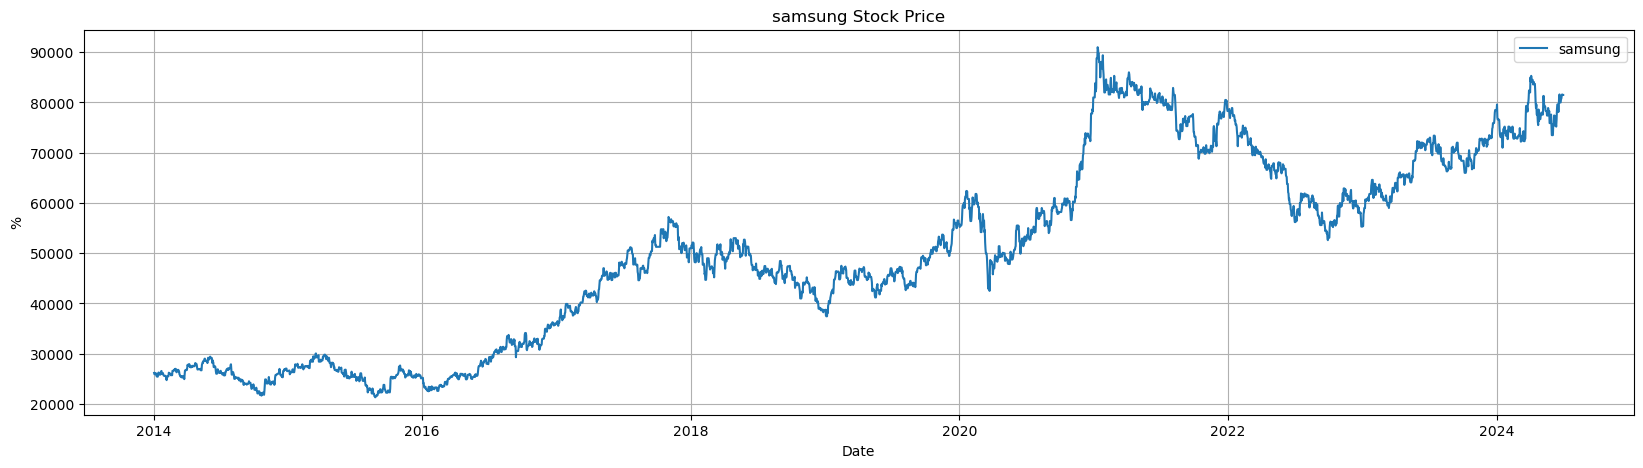

In [18]:
# 삼성 주식 그래프 그리기
plt.figure(figsize=(20, 5))
plt.plot(df['Date'], df[f'{compare1}_Close'], label=f'{compare1}')

plt.title(f'{compare1} Stock Price')
plt.xlabel('Date')
plt.ylabel('%')
plt.legend()
plt.grid(True)

plt.show()

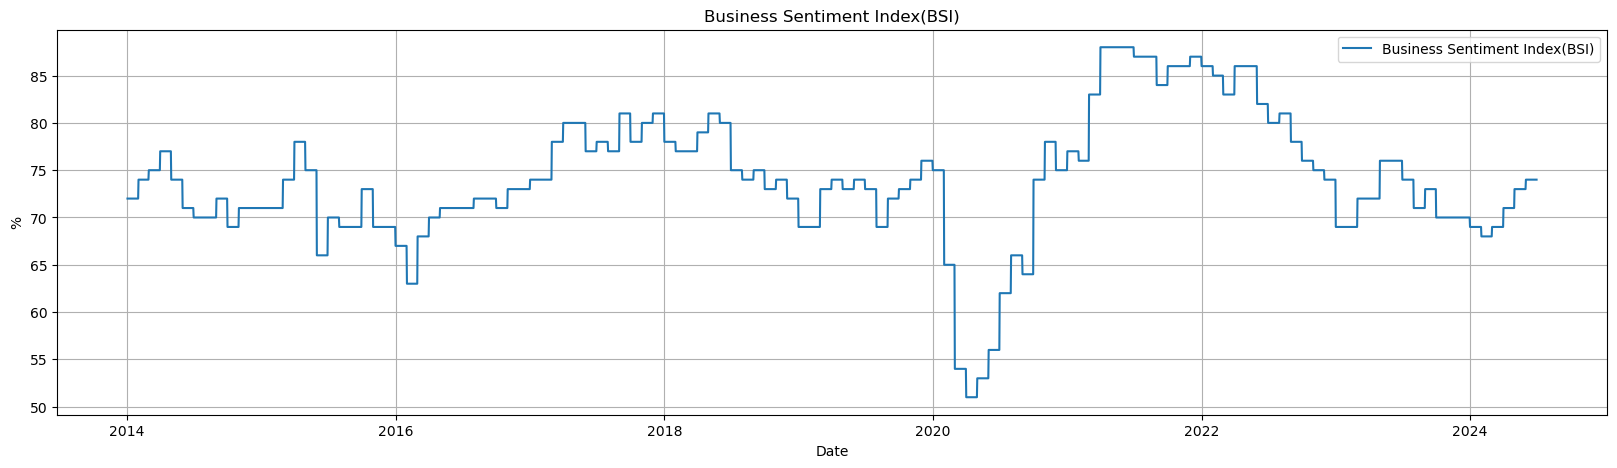

In [19]:
# 한국 기업경기실사지수 그래프 
plt.figure(figsize=(20,5))
plt.plot(df['Date'], df[f'{compare2data}'], label=f'{compare2}')

plt.title(f'{compare2}')
plt.xlabel('Date')
plt.ylabel('%')
plt.legend()
plt.grid(True)

plt.show()

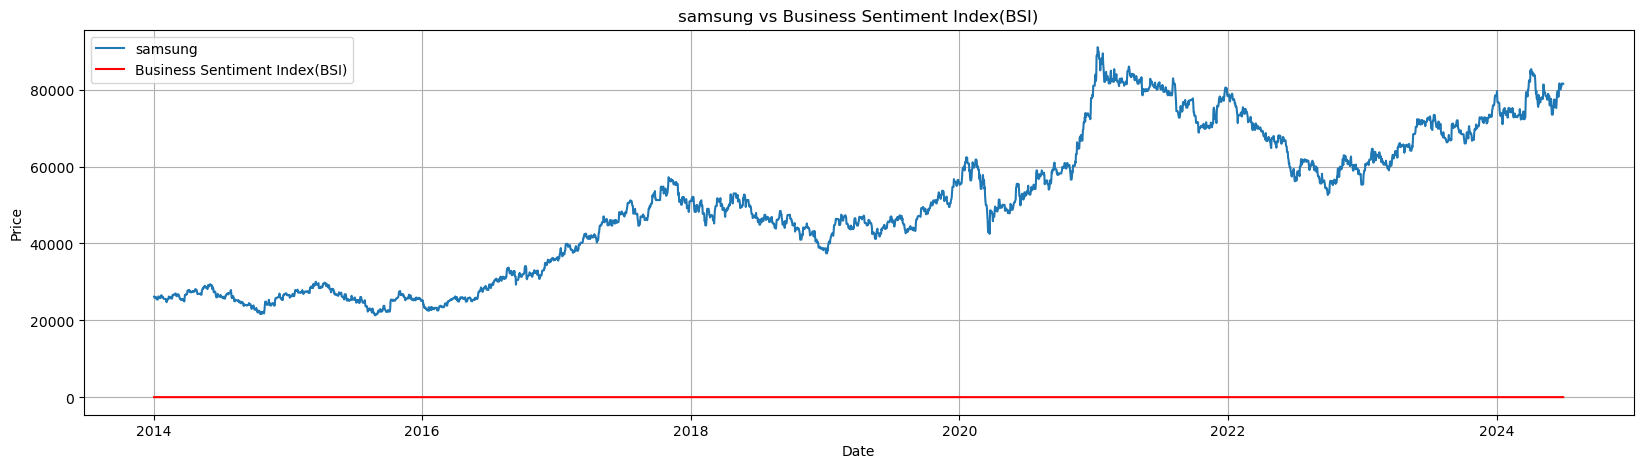

In [20]:
# 삼성 vs 기업경기실사지수 그래프 그리기 
# 삼성은 price 단위 수입은 % 단위 정규화가 필요하다. 
plt.figure(figsize=(20,5))
plt.plot(df['Date'], df[f'{compare1}_Close'], label=f'{compare1}')
plt.plot(df['Date'], df[f'{compare2data}'], label=f'{compare2}', color='red')

plt.title(f'{compare1} vs {compare2}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

In [21]:
# 0과 1 사이의 값으로 정규화
def normalize(df, column):
    return (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [22]:
compare1_normalize = normalize(df, f'{compare1}_Close')
compare2_normalize = normalize(df, f'{compare2data}')

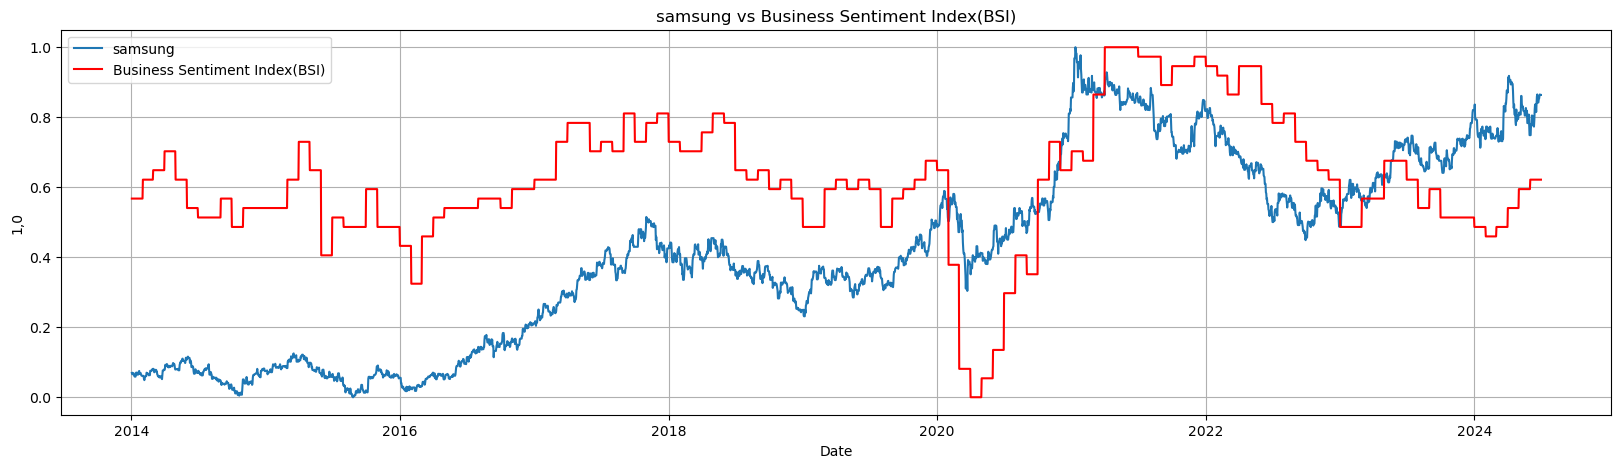

In [23]:
# 정규화 적용 삼성과 한국 기업경기실사지수 그래프
plt.figure(figsize=(20, 5))
plt.plot(df['Date'], compare1_normalize, label=f'{compare1}')
plt.plot(df['Date'], compare2_normalize, label=f'{compare2}', color='red')

plt.title(f'{compare1} vs {compare2}')
plt.xlabel('Date')
plt.ylabel('1,0')
plt.legend()
plt.grid(True)

plt.show()

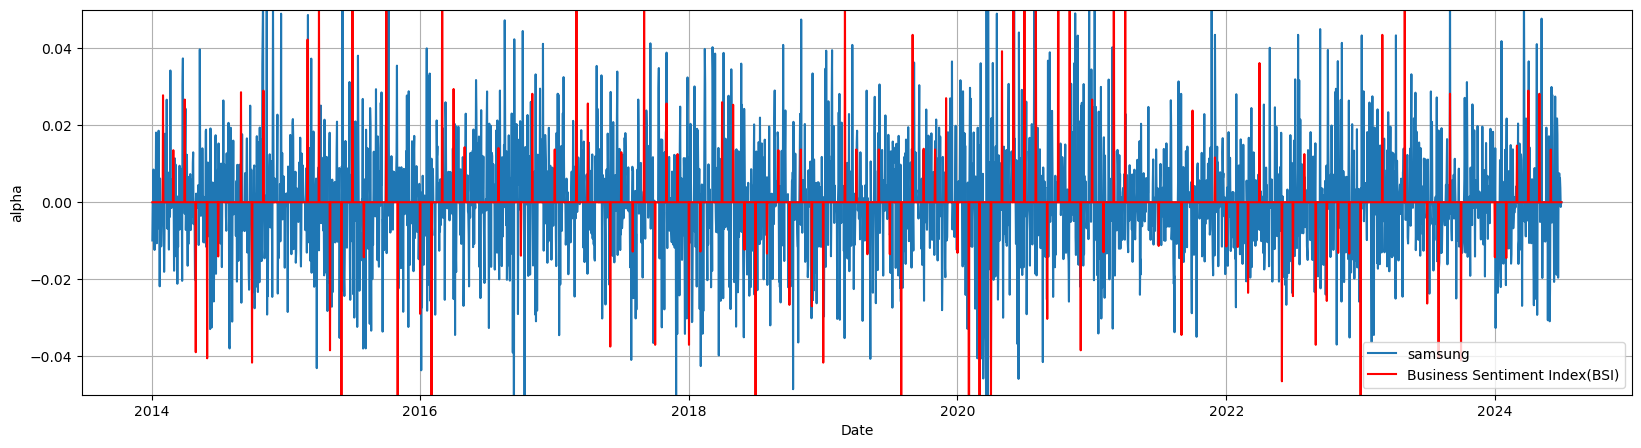

In [24]:
# 변동율 차이 비교
compare1_daily_change = df[f'{compare1}_Close'].pct_change()
compare2_daily_change = df[f'{compare2data}'].pct_change()

#그래프화
plt.figure(figsize=(20,5))
plt.plot(df['Date'], compare1_daily_change, label=f'{compare1}')
plt.plot(df['Date'], compare2_daily_change, label=f'{compare2}', color='red')
plt.ylim(-0.05, 0.05) # y축의 범위: -0.05와 0.05 사이로 y축의 범위를 제한

plt.xlabel('Date')
plt.ylabel('alpha')
plt.legend()
plt.grid(True)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


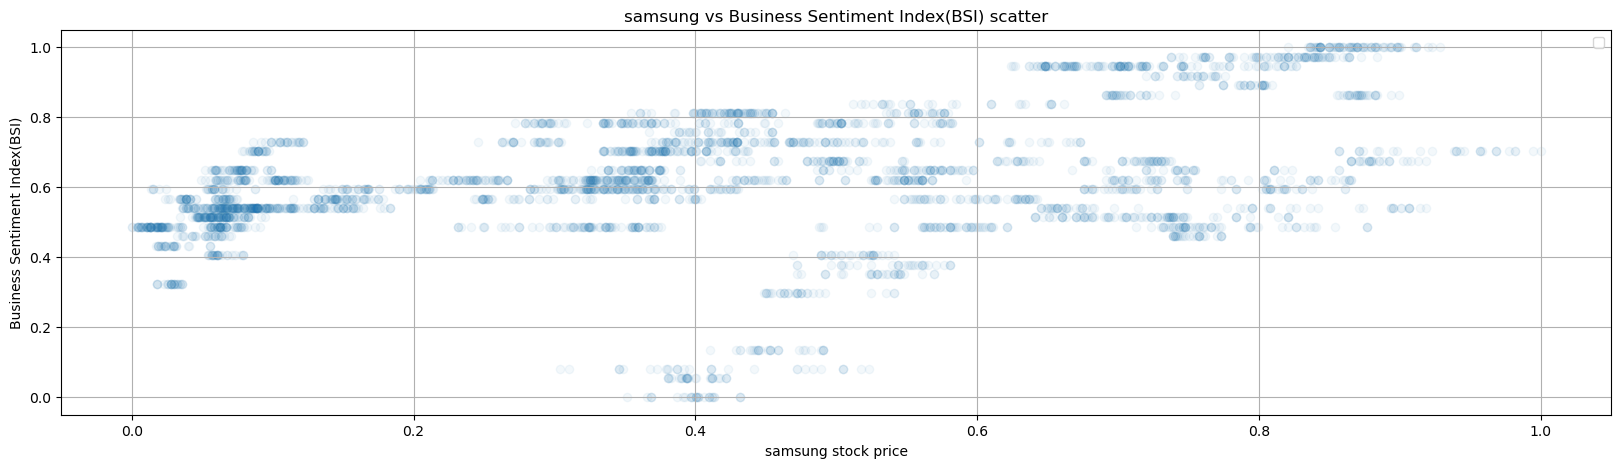

In [25]:
# 정규화 데이터로 산점도 그래프
plt.figure(figsize=(20,5))
plt.scatter(compare1_normalize, compare2_normalize, alpha=0.05) # alpha=0.05의 의미: 허용된 오류 확률: alpha=0.05는 5%

plt.title(f'{compare1} vs {compare2} scatter')
plt.xlabel(f'{compare1} stock price')
plt.ylabel(f'{compare2}')
plt.legend()
plt.grid(True)

plt.show()

In [26]:
# Calculate the correlation
correlation = df[f'{compare2data}'].corr(df[f'{compare1}_Close'])
print(f"Correlation between {compare2} and {compare1} Stock Price: {correlation:.2f}")

Correlation between Business Sentiment Index(BSI) and samsung Stock Price: 0.41
